In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
sns.set(style='whitegrid',color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [80]:
master_data=pd.read_csv('Master_data.csv')
master_data.drop(["Unnamed: 0",'index','cust_id','pincode','fsn_id','order_id','order_item_id'], axis = 1, inplace = True)

#### KPI 1: Adding features related to delivery KPIs

In [81]:
master_data['deliverybdays'] = pd.to_numeric(master_data['deliverybdays'], errors='coerce')
master_data['deliverycdays'] = pd.to_numeric(master_data['deliverycdays'], errors='coerce')
master_data['sla'] = pd.to_numeric(master_data['sla'], errors='coerce')

In [82]:
master_data['delivery_on_time'] = master_data['sla'] - (master_data['deliverybdays']+master_data['deliverycdays']+master_data['product_procurement_sla'])

def delivery_status (delivery_on_time):
    if delivery_on_time < 0:
        return "Delayed"
    elif delivery_on_time > 0:
        return "Early"
    elif delivery_on_time == 0:
        return "On Time"

master_data['delivery_status'] = master_data['delivery_on_time'].apply(delivery_status)

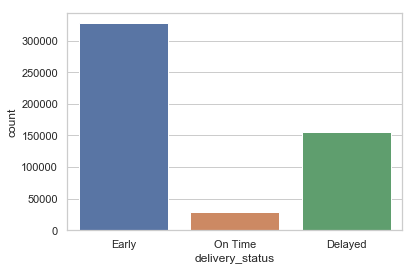

In [83]:
# Exploring the delivery status
sns.countplot(x='delivery_status',data=master_data)

#### KPI 2: Discount

In [84]:
#Create a new variable discount
master_data['discount'] = ((master_data['product_mrp']-master_data['gmv'])/master_data['product_mrp']) * 100

In [85]:
# Inspecting
master_data['discount'].describe()

count    511604.000000
mean         44.743733
std          24.695691
min           0.000000
25%          25.315858
50%          45.462811
75%          62.666667
max          98.602000
Name: discount, dtype: float64

In [86]:
master_data

,order_date,Month,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,...,Day,Week,Year,special_sales,sales_start_week,sales_end_week,Weekday,delivery_on_time,delivery_status,discount
0,2015-10-17 15:11:54,10,6400.0,1,0.0,0.0,COD,5,CE,CameraAccessory,...,17,16,2015.0,(17-15th Oct),16.0,16.0,Saturday,5.0,Early,10.987483
1,2015-10-19 10:07:22,10,6900.0,1,0.0,0.0,COD,7,CE,CameraAccessory,...,19,16,2015.0,(17-15th Oct),16.0,16.0,Monday,7.0,Early,4.033380
2,2015-10-20 15:45:56,10,1990.0,1,0.0,0.0,COD,10,CE,CameraAccessory,...,20,16,2015.0,(17-15th Oct),16.0,16.0,Tuesday,7.0,Early,5.192949
3,2015-10-14 12:05:15,10,1690.0,1,0.0,0.0,Prepaid,4,CE,CameraAccessory,...,14,16,2015.0,(17-15th Oct),16.0,16.0,Wednesday,1.0,Early,19.485469
4,2015-10-17 21:25:03,10,1618.0,1,0.0,0.0,Prepaid,6,CE,CameraAccessory,...,17,16,2015.0,(17-15th Oct),16.0,16.0,Saturday,3.0,Early,22.915674
5,2015-10-17 12:07:24,10,3324.0,1,0.0,0.0,Prepaid,5,CE,CameraAccessory,...,17,16,2015.0,(17-15th Oct),16.0,16.0,Saturday,0.0,On Time,17.804154
6,2015-10-16 14:59:57,10,3695.0,1,0.0,0.0,Prepaid,6,CE,CameraAccessory,...,16,16,2015.0,(17-15th Oct),16.0,16.0,Friday,1.0,Early,8.630069
7,2015-10-15 23:41:39,10,3695.0,1,0.0,0.0,COD,5,CE,CameraAccessory,...,15,16,2015.0,(17-15th Oct),16.0,16.0,Thursday,0.0,On Time,8.630069
8,2015-10-25 22:52:34,10,3695.0,1,0.0,0.0,COD,7,CE,CameraAccessory,...,25,17,0.0,0,0.0,0.0,Sunday,2.0,Early,8.630069
9,2015-10-19 09:37:06,10,3695.0,1,0.0,0.0,COD,8,CE,CameraAccessory,...,19,16,2015.0,(17-15th Oct),16.0,16.0,Monday,3.0,Early,8.630069


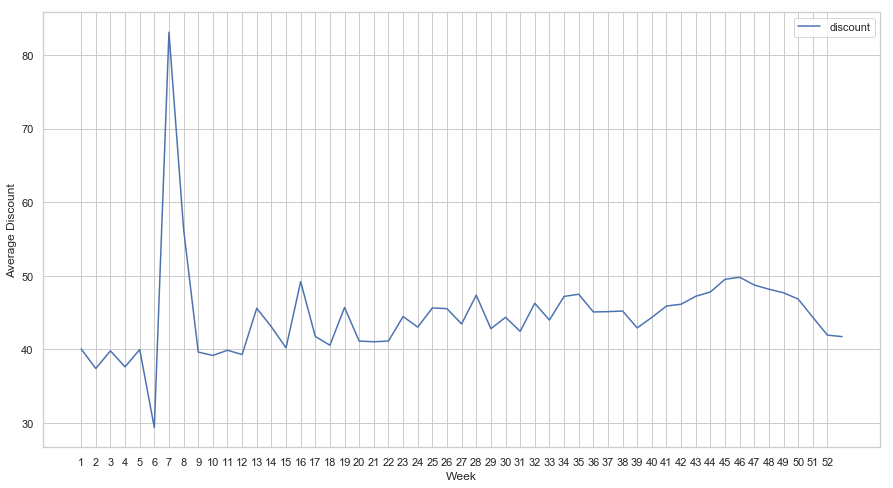

In [87]:
agg=master_data.pivot_table(values = 'discount', 
                      index = 'Week',  
                      aggfunc = 'mean')
agg.plot(figsize=(15,8))
plt.xticks(np.arange(1,53,1))
plt.ylabel('Average Discount')
plt.show()

In [88]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511604 entries, 0 to 511603
Data columns (total 40 columns):
order_date                         511604 non-null object
Month                              511604 non-null int64
gmv                                511604 non-null float64
units                              511604 non-null int64
deliverybdays                      511604 non-null float64
deliverycdays                      511604 non-null float64
s1_fact.order_payment_type         511604 non-null object
sla                                511604 non-null int64
product_analytic_super_category    511604 non-null object
product_analytic_category          511604 non-null object
product_analytic_sub_category      511604 non-null object
product_analytic_vertical          511604 non-null object
product_mrp                        511604 non-null float64
product_procurement_sla            511604 non-null int64
frequency_y                        511604 non-null int64
percent             

#### KPI 3 : is_weekend

In [89]:
# Feature that tell whether a particular order was made on weekday or weekend
master_data['is_weekend']=master_data['Weekday'].apply(lambda x: 1 if (x == 'Saturday' or x == 'Sunday') else 0)

In [90]:
master_data['is_weekend'].head()

0    1
1    0
2    0
3    0
4    1
Name: is_weekend, dtype: int64

#### KPI 3: List Price

In [91]:
master_data['list_price']=(master_data['gmv']/master_data['units'])

In [92]:
master_data['list_price'].describe()

count    511604.000000
mean       1248.406485
std        2348.306204
min          10.000000
25%         290.000000
50%         539.000000
75%        1449.000000
max      148050.000000
Name: list_price, dtype: float64

#### KPI 4 : Pay day

In [93]:
# As per the information provided in the Excel file  
master_data['is_payday']=master_data['Day'].apply(lambda x: 1 if (x == 1 or x == 15) else 0)

In [94]:
master_data['is_payday'].value_counts()

0    478669
1     32935
Name: is_payday, dtype: int64